# Stochastic Procecess and Simulation in Natural Sciences Project

Leonardo Saveri, 3139812\
Date: May 21, 2023

Project: Study the dynamics of a Markov process of your choice in continuous time where the rates are non-linear functions of the state of the system.


In this notebook we will look at the Lotka-Volterra model, a model that is used to analyze pray-predator systems.
This can be modeled as a continous time markov process, because it is time-homogeneous and has the future that depends on the past only thorough the present.

The population changes through time accordin to the following pair of equations:

$\frac{dx}{dt} = \alpha x - \beta xy$

$\frac{dy}{dt} = \delta x y - \gamma y$

where:
* $x$ is the population density of the pray 
(here, rabbits)
* $y$ is the population density of the predator (here, foxes)
* $\frac{dx}{dt}$ and $\frac{dy}{dt}$ are the instantaneous growth rates of the two populations
* $t$ represent the time
* $\alpha$ and $\beta$ represent the pray's parameters, where $\alpha$ is the (maximum) growth rate of the pray, and $\beta$ is the effect of the presence of predators on the prey growth rate (how often the predator and prey come into contact and the predator successfully captures the prey)
* $\gamma$ and $\delta$ represent the predators's parameters, where $\gamma$ is the death rate of the predator, and $\delta$ is the effect of the presence of prey on the predator growth rate (the reproduction rate of the predators per one prey eaten)
* All parameters are positive and real

The Lotka–Volterra predator-prey model has the following assumptions:



+ The prey populations has unlimited food
+ The predators' food supply is only given by the prey population
+ The rate of change of the population is proportional to its size
+ During the process, there is no change in the enviroment so to favour or disatvantage a species
+ Predators have limitless appetite
+ The population can be described by a single variable. There is no spatial or age distribution that contributes to the dynamics.



# Deterministic Lotka–Volterra predator-prey model

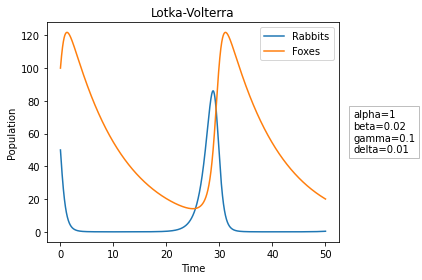

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def run_simulation(alpha, beta, gamma, delta, init, t):
    # Defining the Lotka-Volterra model
    def lotka_volterra(state, t):
        x, y = state
        dx = alpha*x - beta*x*y
        dy = delta*x*y - gamma*y
        return [dx, dy]

    # Solve ODE
    sol = odeint(lotka_volterra, init, t)

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(t, sol[:,0], label='Rabbits')
    ax.plot(t, sol[:,1], label='Foxes')
    
    ax.legend(loc='best')

    text = f'alpha={alpha}\nbeta={beta}\ngamma={gamma}\ndelta={delta}'
    ax.text(1.05, 0.5, text, transform=ax.transAxes, verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))

    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Lotka-Volterra')

    plt.tight_layout()
    plt.show()

# Parameters
alpha = 1
beta = 0.02
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 50, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)


We can see from the plot that the Fox population increases at the beginning, and decreases as the number of rabbits is close to 0.\
We can then see that, when the Fox population decreases under a certain value, the rabbit's population increases pretty quickly, then mimicking the first behavior

We can imagine that, by looking at more time, we will find a sort of repetitive system

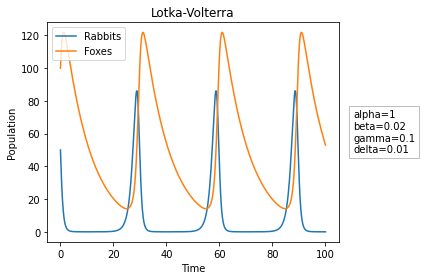

In [2]:
# Parameters
alpha = 1
beta = 0.02
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

## Let's now vary the parameters

Each plot will have the "original" on top to see better the differences

### Increasing alpha

If we set alpha to 1.5 instead of 1, the rabbit population would grow more quickly when there are few or no foxes. This would cause a higher initial peak in the rabbit population, and because there is more prey available, it could also cause a higher subsequent peak in the fox population.

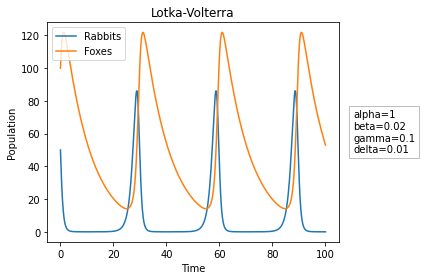

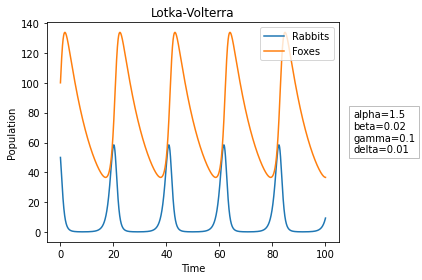

In [3]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1.5
beta = 0.02
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see from the plot, that there is in fact a higher peak in the foxes population, but no initial peak in the rabbit population (probably because at t=0, there are already many more foxes than rabbits). We can try to increas alpha even more to see if it would change.

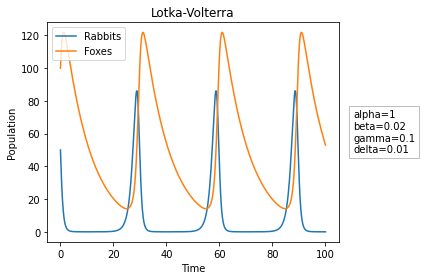

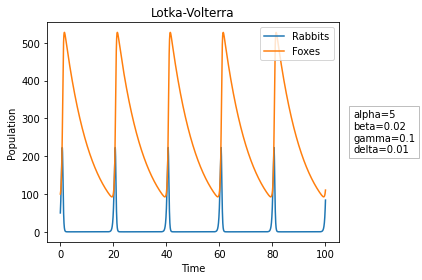

In [4]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 5
beta = 0.02
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see that there is in fact a peak in the beginning

### Decreasing alpha

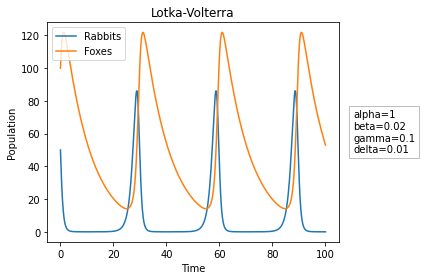

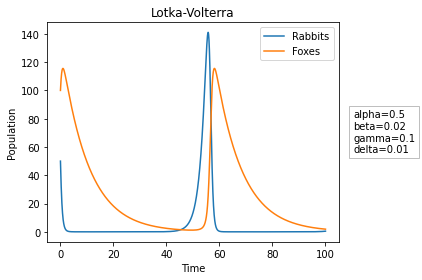

In [5]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 0.5
beta = 0.02
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see instead that, by decreasing alpha, the number of foxes reached an even smaller number before the rabbit population starts increasing again and that, because the foxes population decreased so much that there is later a higher peak for the rabbit population 

### Decreasing Beta

If we set beta to 0.01 instead of 0.02, each fox has less of an impact on decreasing the rabbit population.

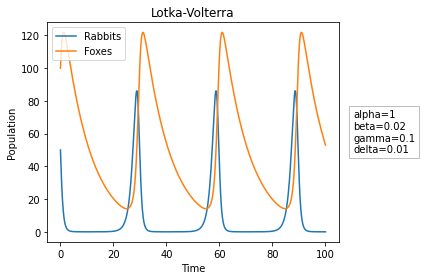

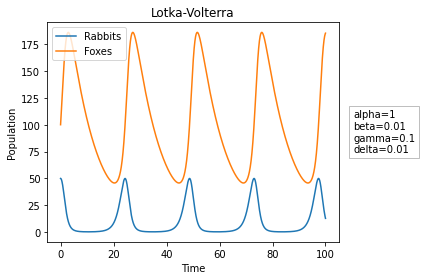

In [6]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.01
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can in fact see that the fox's population has to decrease less for the rabbit's population to go back up.

### Increasing Beta

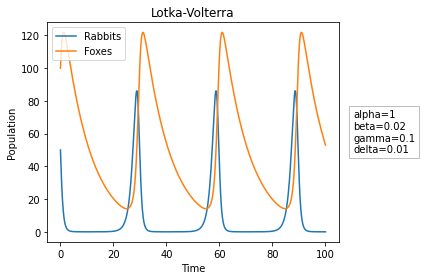

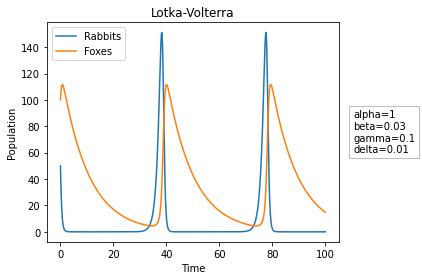

In [7]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.03
gamma = 0.1
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

By increasing Beta, we can see that the fox's population has to reach almost 0, so then the rabbit's population can have higher peaks.

### Increasing Gamma

If we set gamma to 0.3 instead of 0.1, the foxes would die off more quickly. This could cause a lower overall fox population, and the fox population could have lower peaks and higher valleys.

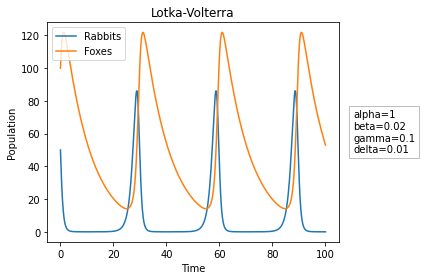

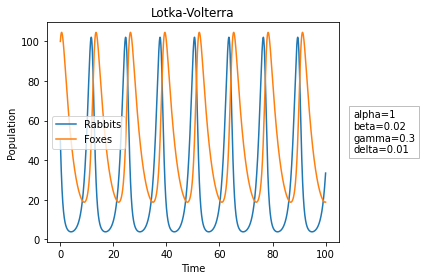

In [8]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.02
gamma = 0.3
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see from the graph that the Fox's population rate decreases faster once the rabbit's population decreases, but then the rabbit's population goes up and the Fox's population goes up fast as well.

### Decreasing Gamma

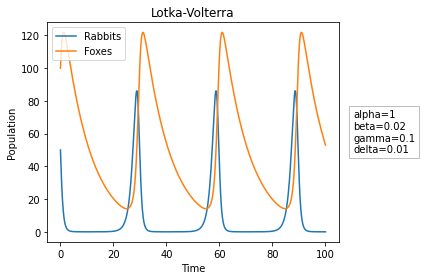

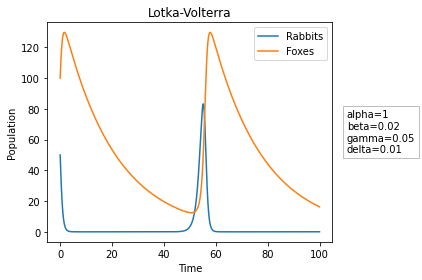

In [9]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.02
gamma = 0.05
delta = 0.01
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see instead that, by decreasing the rate of death of the foxes, the rate of population of the foxes decreases slower.

### Decreasing Delta

If we set delta to 0.005 instead of 0.01, each rabbit contributes less to increasing the fox population.

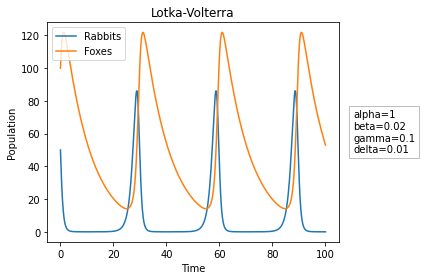

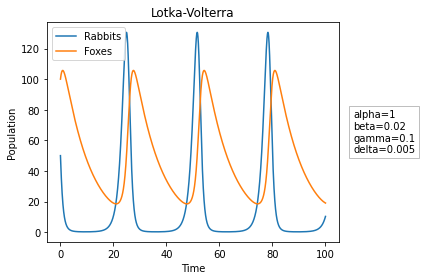

In [10]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.02
gamma = 0.1
delta = 0.005
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see in fact that the population of Foxes does not reach the same hight as before and that it takes them more time to go up once the rabbit are more.

### Increasing Delta

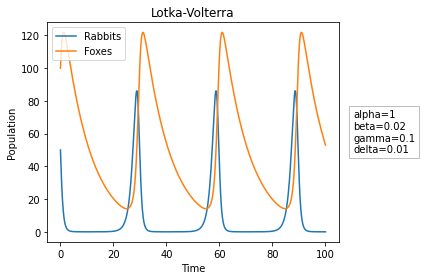

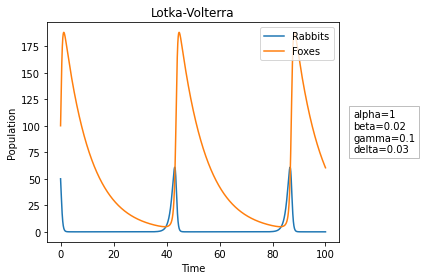

In [11]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.02
gamma = 0.1
delta = 0.03
init = [50, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

We can see that, increasing delta, each rabbit contributes more to the population of foxes, thus makind the spike of the foxes' population higher than before once the rabbits' population has increased.

### Changing the initial condition

If we set init to [100, 200] instead of [50, 100], we have more rabbits and foxes at the beginning. The larger initial rabbit population could lead to a higher peak in the fox population, and the larger initial fox population could cause a sharper initial decline in the rabbit population.

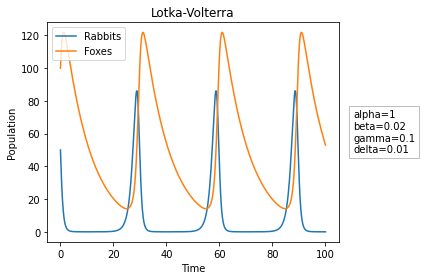

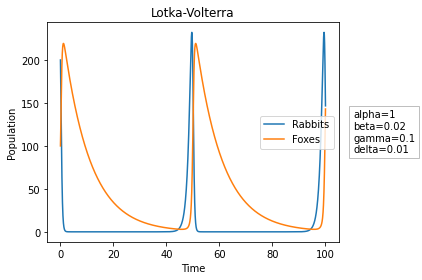

In [12]:
run_simulation(1, 0.02, 0.1, 0.01, [50, 100], np.linspace(0, 100, num=5000))

# Parameters
alpha = 1
beta = 0.02
gamma = 0.1
delta = 0.01
init = [200, 100]
t = np.linspace(0, 100, num=5000)

run_simulation(alpha, beta, gamma, delta, init, t)

As we can see, this was indeed right.

## Let's plot a dynamic plot

In this way it can be easier to see the outcome of what changes if we change some initial parameters

In [13]:
from ipywidgets import interact, FloatSlider

def lotka_volterra(state, t, alpha, beta, gamma, delta):
    x, y = state
    dx = alpha*x - beta*x*y
    dy = delta*x*y - gamma*y
    return [dx, dy]

t = np.linspace(0, 100, num=5000)

@interact(alpha=FloatSlider(min=0, max=2, step=0.01, value=1),
          beta=FloatSlider(min=0, max=0.2, step=0.01, value=0.02),
          gamma=FloatSlider(min=0, max=1, step=0.01, value=0.1),
          delta=FloatSlider(min=0, max=0.2, step=0.01, value=0.01),
          init_preys=FloatSlider(min=0, max=200, step=1, value=50),
          init_predators=FloatSlider(min=0, max=200, step=1, value=100))
def plot(alpha, beta, gamma, delta, init_preys, init_predators):
    init = [init_preys, init_predators]
    sol = odeint(lotka_volterra, init, t, args=(alpha, beta, gamma, delta))

    plt.figure(figsize=(6, 4))
    plt.plot(t, sol[:, 0], label='Rabbits')
    plt.plot(t, sol[:, 1], label='Foxes')

    plt.legend(loc='best')

    text = f'alpha={alpha}\nbeta={beta}\ngamma={gamma}\ndelta={delta}'
    plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))

    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Lotka-Volterra')
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.01), FloatSlider(value=0.02,…

# Let's now consied stochasticity

The current system does not include stochasticity, this means that it does not account for random events or noise that may affect the system's behavior. This could include things like sudden disease outbreaks, natural disasters, random fluctuations in birth or death rates, etc. In the real world, these kinds of events can have significant effects on population dynamics.

We can introduce stochasticity into the Lotka-Volterra system by adding random noise to the right hand side of the differential equations. We used a Gaussian noise term with a mean of zero and a certain standard deviation and added these standard deviations, sigma_x and sigma_y as additional parameters to the function.

I'm using sdeint as a solver to stochastic differential equations.

In [14]:
!pip install sdeint


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [15]:
import sdeint

def lotka_volterra_sde(state, t, alpha, beta, gamma, delta):
    x, y = state
    dx = alpha*x - beta*x*y
    dy = delta*x*y - gamma*y
    return np.array([dx, dy])

def sde_noise(state, t, sigma_x, sigma_y):
    return np.diag([sigma_x*state[0], sigma_y*state[1]])

t = np.linspace(0, 100, num=5000)

@interact(alpha=FloatSlider(min=0, max=2, step=0.01, value=1),
          beta=FloatSlider(min=0, max=0.2, step=0.01, value=0.02),
          gamma=FloatSlider(min=0, max=1, step=0.01, value=0.1),
          delta=FloatSlider(min=0, max=0.2, step=0.01, value=0.01),
          sigma_x=FloatSlider(min=0, max=1, step=0.1, value=0.1),
          sigma_y=FloatSlider(min=0, max=1, step=0.1, value=0.1),
          init_preys=FloatSlider(min=0, max=200, step=1, value=50),
          init_predators=FloatSlider(min=0, max=200, step=1, value=100))

def plot(alpha=1, beta=0.02, gamma=0.1, delta=0.01, sigma_x=0.3, sigma_y=0.3, init_preys=50, init_predators=100):
    init = [init_preys, init_predators]
    sol_sde = sdeint.itoint(lambda x, t: lotka_volterra_sde(x, t, alpha, beta, gamma, delta), 
                            lambda x, t: sde_noise(x, t, sigma_x, sigma_y), 
                            init, t)
    sol_ode = odeint(lambda x, t: lotka_volterra_sde(x, t, alpha, beta, gamma, delta), init, t)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t, sol_ode[:, 0], label='Rabbits')
    plt.plot(t, sol_ode[:, 1], label='Foxes')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Deterministic Lotka-Volterra')

    plt.legend(loc='best')

    text = f'alpha={alpha}\nbeta={beta}\ngamma={gamma}\ndelta={delta}'
    plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))

    plt.subplot(1, 2, 2)
    plt.plot(t, sol_sde[:, 0], label='Rabbits')
    plt.plot(t, sol_sde[:, 1], label='Foxes')

    plt.legend(loc='best')

    text = f'alpha={alpha}\nbeta={beta}\ngamma={gamma}\ndelta={delta}\nsigma_x={sigma_x}\nsigma_y={sigma_y}'
    plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, verticalalignment='center', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5))

    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Stochastic Lotka-Volterra')

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.01), FloatSlider(value=0.02,…

When sigma_x and sigma_y are set to low values, such as 0.1, the noise has a relatively small effect on the populations. The population curves in the plots will be relatively smooth, following the deterministic Lotka-Volterra equations. The populations of rabbits and foxes will exhibit stable oscillations around their equilibrium values.\
Said so, let's consider the fact that there is always some randomness, so the plot might look quite different from the deterministic one.


However, when sigma_x and sigma_y are increased to higher values the noise becomes more significant. The population curves will become less predictable, and the oscillations will show larger fluctuations. The noise introduces randomness into the system, causing unpredictable deviations from the deterministic predictions. This stochastic behavior can lead to population spikes or drops, and it becomes more challenging to discern a clear pattern or stable equilibrium.

## Some final remarks:

There might be some cases in which the Population enters the negative values. This is due to the approximation of the solver, and it generally is only over a very small iterval under 0.

I have tried very few combinations of parameters, but I hope this gives a general idea of what would happen with each variation and I hope the dynamic plots are good enough to give a general idea.

Of course, if sigma_x and sigma_y are set to 0, the stochastic and deterministic functions coincide.

## Next?

Even though we saw how adding stochasticity we can get a more realistic pray-predator model, this is far from what we can see in real life.

Some next steps could involve:

+ considering more than just 1 pray and predator, in real life there are many cases in which this would be unrealistic. To do this, we would need to add more differential equations, and their right part would depend on the relationship that there is between them

+ adding specific parameters on the right side of the differential equations to take into consideration the limit on food, on appetite, the age and the disadvantages that a specific species might have in a specific enviroment